In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

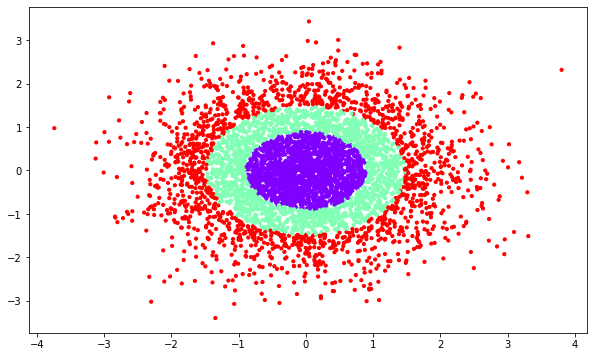

In [2]:
X, y = make_gaussian_quantiles(n_samples=5000, random_state=0)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='rainbow');
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
classifier = DecisionTreeClassifier(max_depth=3)

In [7]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
dt_train_pred = classifier.predict(X_train)
dt_test_pred = classifier.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, dt_train_pred))
print(accuracy_score(y_test, dt_test_pred))

0.56
0.5636363636363636


**Random Forest:**

In [10]:
rf = RandomForestClassifier(n_estimators=50, max_depth=5)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

print(accuracy_score(y_train, rf_train_pred))
print(accuracy_score(y_test, rf_test_pred))

0.9173134328358209
0.9072727272727272


**Bagging and Boosting:**

In [12]:
bg = BaggingClassifier(LogisticRegression(max_iter=1000), n_estimators=100)
bg.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None,
                                                    max_iter=1000,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=100, n_jobs=None,

In [13]:
print(bg.score(X_train, y_train))
print(bg.score(X_test,y_test))

0.3414925373134328
0.30787878787878786


**Boosting:**

In [15]:
p = AdaBoostClassifier(RandomForestClassifier(n_estimators=25, max_depth=5), n_estimators=100, learning_rate=0.001)
p.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                          

In [16]:
print(p.score(X_train, y_train))
p.score(X_test,y_test)

0.9185074626865671


0.9090909090909091

In [19]:
q_pred = ad.predict(X_test)

In [20]:
accuracy_score(y_test, q_pred)

0.9096969696969697

In [21]:
train_pred = p.predict(X_train)
accuracy_score(y_train, train_pred)

0.9185074626865671